In [ ]:
# IMPORTS
%load_ext autoreload
%autoreload 2
import numpy as np
from scipy.fft import irfft, rfft, rfftfreq
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
from scipy.signal import welch, periodogram, get_window
import os


from funcs_dsp import *
from funcs_df import load_df

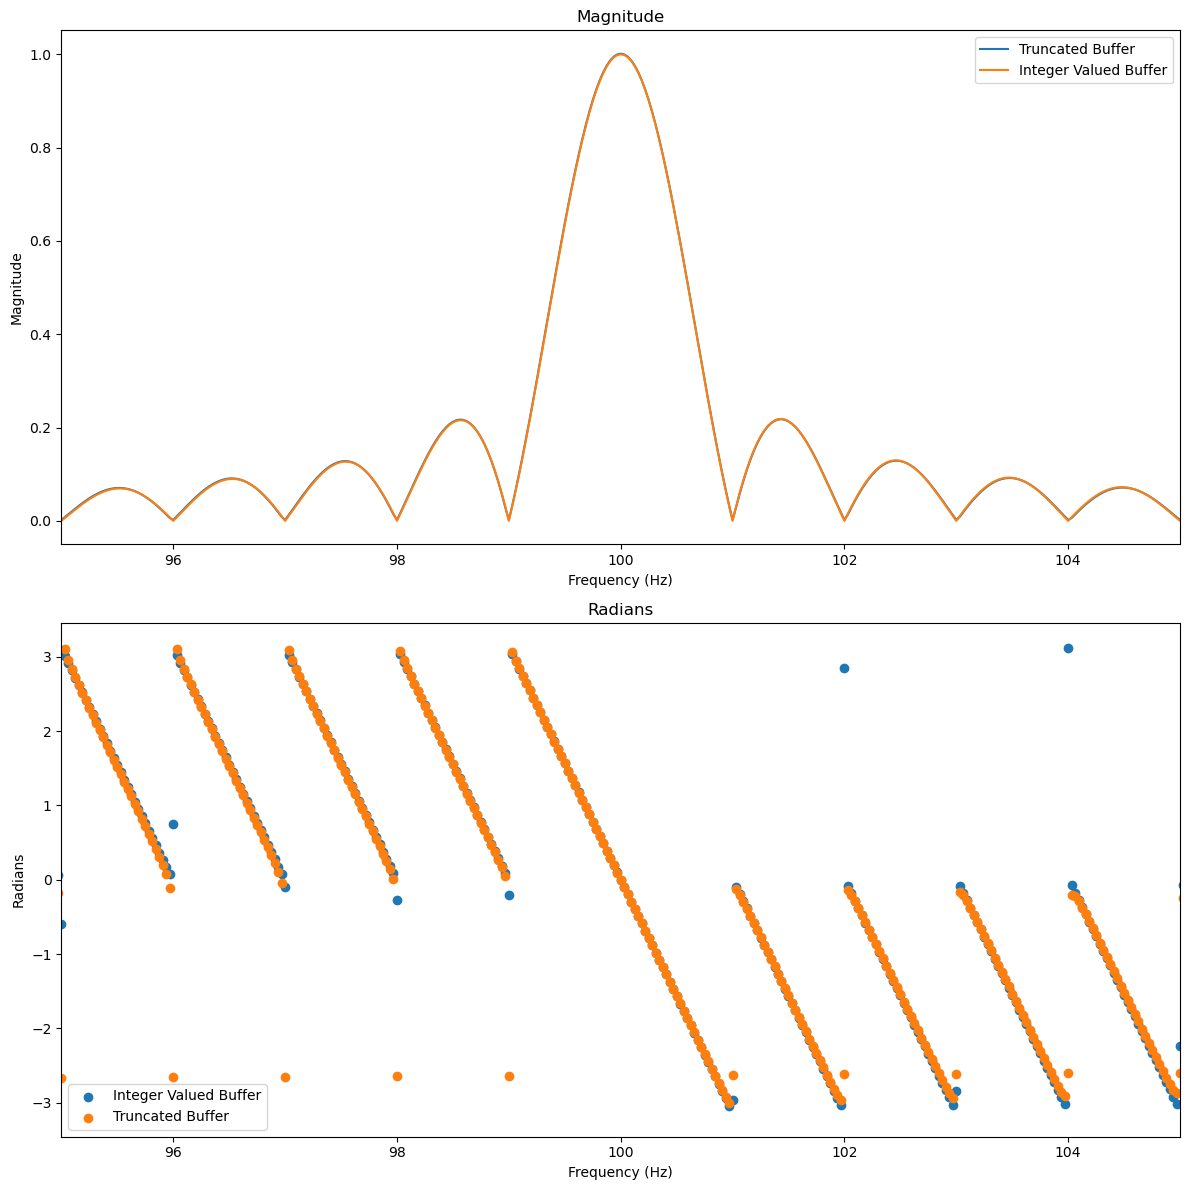

In [61]:
# (Sampled) DTFT of a boxcar window with nperseg nonzero points
def boxcar_DTFT(x, N, fs):
    def func(x):
        return (np.sin((N + 1) * x * np.pi / fs) / np.sin((x) * np.pi / fs)) * np.exp(-1j * N * np.pi * x / fs)
    # Handle the case where x = 0
    if np.any(x == 0):
        center_idx = np.where(x == 0)[0][0]
        result = np.empty_like(x, dtype=complex)
        result[0:center_idx] = func(x[0:center_idx])
        result[center_idx + 1:] = func(x[center_idx + 1:])
        result[center_idx] = (N + 1)
    else:
        result = func(x)
    return result / (N + 1)

# This should be the zero-padded DFT magnitudes of a sinusoid -- e.g. the convolution of a delta with the previous boxcar DTFT
def Dirichlet_mag(x, x0, amp, N, fs):
    return amp * np.abs(boxcar_DTFT(x - x0, N, fs))

def Dirichlet_phase(x, x0, N, fs):
    return np.angle(boxcar_DTFT(x - x0, N, fs))

plt.close('all')
fs = 1000
f0 = 100
z_pad = 32

t_max_int = 1
t_int = np.arange(0, t_max_int, 1/fs)
y_int = np.cos(2*np.pi*f0*t_int)

t_max_trunc = 0.997
t_trunc = np.arange(0, t_max_trunc, 1/fs)
y_trunc = np.cos(2*np.pi*f0*t_trunc)

N_int = len(y_int)
N_z = N_int*z_pad
N_trunc = len(y_trunc)

xwidth = 5

spec_int = rfft(y_int, n=N_z) / len(y_int) * 2
spec_trunc = rfft(y_trunc, n=N_z) / len(y_trunc) * 2

freq = rfftfreq(N_z, 1/fs)

plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.title("Magnitude")
plt.plot(freq, np.abs(spec_trunc), label = 'Truncated Buffer')
plt.plot(freq, np.abs(spec_int), label = 'Integer Valued Buffer')
plt.xlim(f0 - xwidth, f0 + xwidth)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()


plt.subplot(2, 1, 2)
plt.title("Radians")
plt.scatter(freq, np.angle(spec_int), label = 'Integer Valued Buffer')
plt.scatter(freq, np.angle(spec_trunc), label = 'Truncated Buffer')


plt.xlim(f0 - xwidth, f0 + xwidth)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Radians")
plt.legend()


plt.tight_layout()




In [ ]:
# plt.subplot(2, 2, 1)
# plt.title("Integer Buffer: Magnitude")
# plt.plot(freq, np.abs(spec_int), label = 'Integer Valued Buffer')
# plt.plot(freq, Dirichlet_mag(freq, f0, 1, N_int, fs), label = 'Boxcar DTFT Mags')
# plt.xlim(f0 - xwidth, f0 + xwidth)
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Magnitude")
# plt.legend()


# plt.subplot(2, 2, 2)
# plt.title("Truncated Buffer: Magnitude")
# plt.plot(freq, np.abs(spec_trunc), label = 'Truncated Buffer')
# plt.plot(freq, Dirichlet_mag(freq, f0, 1, N_trunc, fs), label = 'Boxcar DTFT Mags')
# plt.xlim(f0 - xwidth, f0 + xwidth)
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Magnitude")
# plt.legend()



# plt.subplot(2, 2, 3)
# plt.title("Integer Buffer: Radians")
# plt.scatter(freq, np.angle(spec_int), label = 'Integer Valued Buffer')
# plt.scatter(freq, Dirichlet_phase(freq, f0, N_int, fs), label = 'Boxcar DTFT Phases')
# plt.xlim(f0 - xwidth, f0 + xwidth)
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Radians")
# plt.legend()


# plt.subplot(2, 2, 4)
# plt.title("Truncated Buffer: Radians")
# plt.scatter(freq, np.angle(spec_trunc), label = 'Truncated Buffer')
# plt.scatter(freq, Dirichlet_phase(freq, f0, N_trunc, fs), label = 'Boxcar DTFT Phases')
# plt.xlim(f0 - xwidth, f0 + xwidth)
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Radians")
# plt.legend()


# plt.tight_layout()